<a href="https://colab.research.google.com/github/Bel-93/C-Fuzzy/blob/main/Conglomerados_Fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

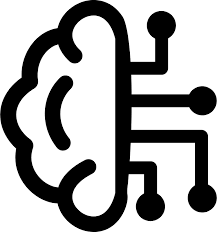

**Instalar librerias**

In [1]:
!pip install scikit-fuzzy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import skfuzzy as fuzz
from sklearn.preprocessing import StandardScaler

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=888e45180390b88e28bd4a11cca186a273fb081afa6fb1024055db7c37e7197b
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


**Data**

In [2]:
with open('Data_mall.txt', 'r') as f:
    contenido = f.read()

In [3]:
contenido

'"customer_id","gender","age","annual_income","spending_score"\n1,"Male",19,15,39\n2,"Male",21,15,81\n3,"Female",20,16,6\n4,"Female",23,16,77\n5,"Female",31,17,40\n6,"Female",22,17,76\n7,"Female",35,18,6\n8,"Female",23,18,94\n9,"Male",64,19,3\n10,"Female",30,19,72\n11,"Male",67,19,14\n12,"Female",35,19,99\n13,"Female",58,20,15\n14,"Female",24,20,77\n15,"Male",37,20,13\n16,"Male",22,20,79\n17,"Female",35,21,35\n18,"Male",20,21,66\n19,"Male",52,23,29\n20,"Female",35,23,98\n21,"Male",35,24,35\n22,"Male",25,24,73\n23,"Female",46,25,5\n24,"Male",31,25,73\n25,"Female",54,28,14\n26,"Male",29,28,82\n27,"Female",45,28,32\n28,"Male",35,28,61\n29,"Female",40,29,31\n30,"Female",23,29,87\n31,"Male",60,30,4\n32,"Female",21,30,73\n33,"Male",53,33,4\n34,"Male",18,33,92\n35,"Female",49,33,14\n36,"Female",21,33,81\n37,"Female",42,34,17\n38,"Female",30,34,73\n39,"Female",36,37,26\n40,"Female",20,37,75\n41,"Female",65,38,35\n42,"Male",24,38,92\n43,"Male",48,39,36\n44,"Female",31,39,61\n45,"Female",49,39,2

In [4]:
lineas = contenido.split('\n')

In [7]:
# Dividir cada línea en sus campos
datos = [linea.split(',') for linea in lineas]

In [8]:
df = pd.DataFrame(datos, columns=["customer_id","gender","age","annual_income","spending_score"])

In [10]:
#Borrar la primera fila
df = df.drop(0)
df = df.reset_index(drop=True)

In [11]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,"""Male""",19,15,39
1,2,"""Male""",21,15,81
2,3,"""Female""",20,16,6
3,4,"""Female""",23,16,77
4,5,"""Female""",31,17,40


In [13]:
#Verificar datos faltantes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    object
 1   gender          200 non-null    object
 2   age             200 non-null    object
 3   annual_income   200 non-null    object
 4   spending_score  200 non-null    object
dtypes: object(5)
memory usage: 7.9+ KB
None


**Preparando la data para el modelo**

In [14]:
# Pre procesamiento de la data
X = df[['annual_income', 'spending_score']].values
print(X)

[['15' '39']
 ['15' '81']
 ['16' '6']
 ['16' '77']
 ['17' '40']
 ['17' '76']
 ['18' '6']
 ['18' '94']
 ['19' '3']
 ['19' '72']
 ['19' '14']
 ['19' '99']
 ['20' '15']
 ['20' '77']
 ['20' '13']
 ['20' '79']
 ['21' '35']
 ['21' '66']
 ['23' '29']
 ['23' '98']
 ['24' '35']
 ['24' '73']
 ['25' '5']
 ['25' '73']
 ['28' '14']
 ['28' '82']
 ['28' '32']
 ['28' '61']
 ['29' '31']
 ['29' '87']
 ['30' '4']
 ['30' '73']
 ['33' '4']
 ['33' '92']
 ['33' '14']
 ['33' '81']
 ['34' '17']
 ['34' '73']
 ['37' '26']
 ['37' '75']
 ['38' '35']
 ['38' '92']
 ['39' '36']
 ['39' '61']
 ['39' '28']
 ['39' '65']
 ['40' '55']
 ['40' '47']
 ['40' '42']
 ['40' '42']
 ['42' '52']
 ['42' '60']
 ['43' '54']
 ['43' '60']
 ['43' '45']
 ['43' '41']
 ['44' '50']
 ['44' '46']
 ['46' '51']
 ['46' '46']
 ['46' '56']
 ['46' '55']
 ['47' '52']
 ['47' '59']
 ['48' '51']
 ['48' '59']
 ['48' '50']
 ['48' '48']
 ['48' '59']
 ['48' '47']
 ['49' '55']
 ['49' '42']
 ['50' '49']
 ['50' '56']
 ['54' '47']
 ['54' '54']
 ['54' '53']
 ['54

In [15]:
# Escalar la data para mantenerlos a una misma magnitud
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]
 [-1.66266033  1.00159627]
 [-1.62449091 -1.71591298]
 [-1.62449091  1.70038436]
 [-1.58632148 -1.83237767]
 [-1.58632148  0.84631002]
 [-1.58632148 -1.4053405 ]
 [-1.58632148  1.89449216]
 [-1.54815205 -1.36651894]
 [-1.54815205  1.04041783]
 [-1.54815205 -1.44416206]
 [-1.54815205  1.11806095]
 [-1.50998262 -0.59008772]
 [-1.50998262  0.61338066]
 [-1.43364376 -0.82301709]
 [-1.43364376  1.8556706 ]
 [-1.39547433 -0.59008772]
 [-1.39547433  0.88513158]
 [-1.3573049  -1.75473454]
 [-1.3573049   0.88513158]
 [-1.24279661 -1.4053405 ]
 [-1.24279661  1.23452563]
 [-1.24279661 -0.7065524 ]
 [-1.24279661  0.41927286]
 [-1.20462718 -0.74537397]
 [-1.20462718  1.42863343]
 [-1.16645776 -1.7935561 ]
 [-1.16645776  0.88513158]
 [-1.05194947 -1.7935561 ]
 [-1.05194947  1.62274124]
 [-1.05194947 -1.4053405 ]
 [-1.05194947  1.19570407]
 [-1.01378004 -1.28887582]
 

**Fuzzy**

In [16]:
#Ejecutar Fuzzy C Means clustering
n_clusters = 5  # Número de clusters
m = 2  # Fuzziness parametro, valor dado por el experimentador

In [17]:
cntr, u, u0,d,jm,p, fpc = fuzz.cluster.cmeans(
    X_scaled.T, n_clusters, m, error=0.005, maxiter=1000, init=None
)
#u: la matriz de partición difusa final, donde cada elemento u[i, j] representa el grado de membresía.
#u0: la matriz de partición difusa inicial.
#d: La matriz de distancia final, donde cada elemento d[i, j] representa la distancia entre el i-ésimo punto de datos y el j-ésimo centroide del grupo.
#jm: el valor de la función objetivo en cada iteración del algoritmo.
#p: El número final de iteraciones realizadas por el algoritmo.
#fpc: coeficiente de partición difusa (FPC), que mide la calidad de la solución de agrupación.

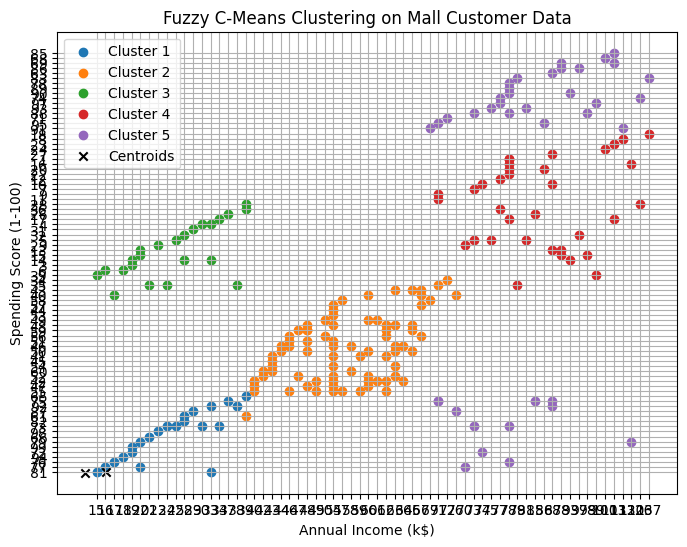

In [18]:
# Visualize the clusters
cluster_membership = np.argmax(u, axis=0)

plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    plt.scatter(X[cluster_membership == i, 0], X[cluster_membership == i, 1], label=f'Cluster {i+1}')

plt.scatter(cntr[0], cntr[1], marker='x', color='black', label='Centroids')

plt.title('Fuzzy C-Means Clustering on Mall Customer Data')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

**Fuzzy**

-Ventajas: Flexibilidad, Robustez al ruido y asignaciones suaves

-Desventajas: Sensibilidad a las inicializaciones- El rendimiento es sensible a la ubicación inicial de los centroides del grupo.
Complejidad computacional y Selección de parámetros.